In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
tweets_df = pd.read_csv('/Users/nitanshjain/Documents/Projects/Twitter_Data_Analysis/v2/data/tweets_cleaned_v2.csv')
print(tweets_df.shape)
tweets_df.head()

(18057, 4)


,tweet_id,tweet,city,year
0,0,very bad thing say that government did not med...,Mumbai,2022
1,1,all netas and their family should admitted onl...,Mumbai,2022
2,2,govandi one the hotspot well other respiratory...,Mumbai,2022
3,3,till when medical negligence will exist govern...,Mumbai,2022
4,4,being doctor reading this also government hosp...,Mumbai,2022


In [3]:
print('Tweets by City\n')
print(tweets_df['city'].value_counts())

print('Tweets by Year\n')
print(tweets_df['year'].value_counts())

Tweets by City

city
Delhi        6864
Mumbai       4614
Hyderabad    2408
Bangalore    2327
Kolkata      1030
Chennai       814
Name: count, dtype: int64
Tweets by Year

year
2020    6041
2021    5049
2019    2613
2022    2356
2018    1998
Name: count, dtype: int64


# Pre Sentiment Analysis

In [4]:
wc = WordCloud(stopwords=['acronym', 'hospital', 'terminal', 'rich', 'environment', 'government', 'doctor', 'understand', 'mean', 'patient'], min_word_length=5, background_color='white', colormap="Dark2", max_words=1000, width=800, height=400, random_state=42)

Bangalore
Chennai
Delhi
Hyderabad
Kolkata
Mumbai


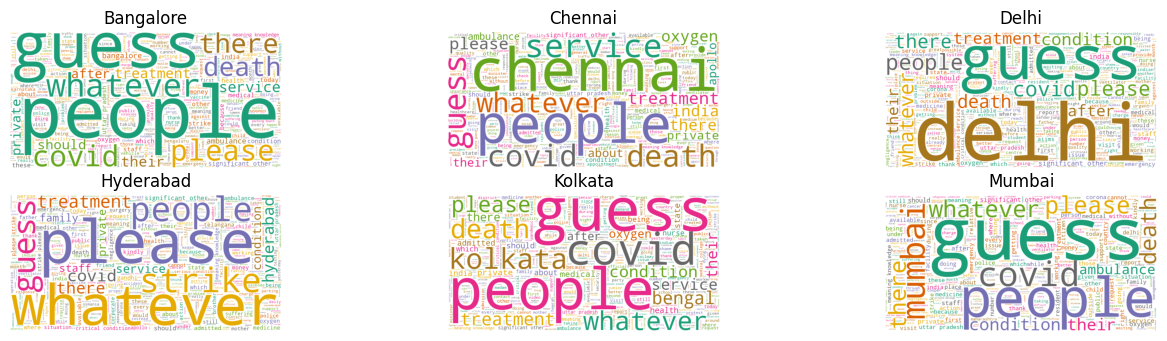

In [5]:
text = tweets_df.groupby('city')['tweet'].apply(lambda x:x.str.cat(sep=" "))
cities = ['Bangalore', 'Chennai', 'Delhi',  'Hyderabad', 'Kolkata', 'Mumbai']


text = text.to_frame()
text.index = cities

# creating a word cloud for all the tweets city wise
plt.rcParams['figure.figsize'] = [16, 6]


for index, city in enumerate(text.index):
    print(city)
    wc.generate(text.tweet[city])
    
    plt.subplot(3, 3, index+1)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(cities[index])
    
plt.show()                                     

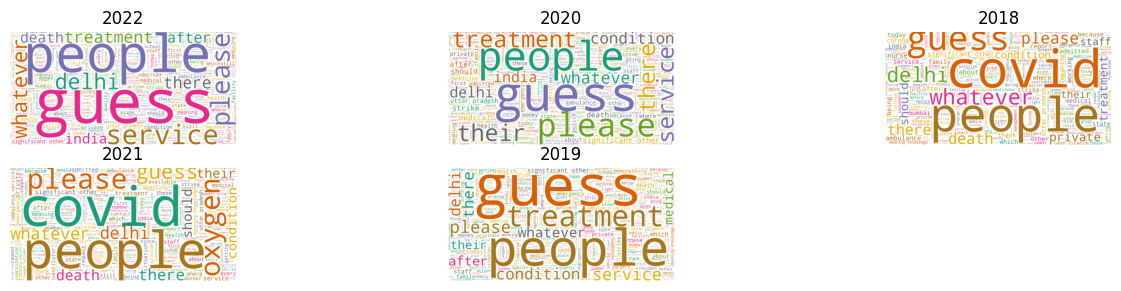

In [6]:
text = tweets_df.groupby('year')['tweet'].apply(lambda x:x.str.cat(sep=" "))
# years = ['2018', '2019', '2020', '2021', '2022']
years = ['2022', '2020', '2018', '2021', '2019']

text = text.to_frame()
text.index = years

# creating a word cloud for all the tweets city wise
plt.rcParams['figure.figsize'] = [16, 5]

for index, year in enumerate(text.index):
    wc.generate(text.tweet[year])
    
    plt.subplot(3, 3, index+1)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(years[index])
    
plt.show()                                     